In [1]:
#drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from scipy.spatial import distance
from copy import copy

DATA PRE-PROCESSING

In [3]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENT_DATASET/IRIS.csv')

In [4]:
df.head()    #Return first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()   #Generate descriptive statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#how many samples for each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
#Iris Setosa, Iris virginica, and Iris versicolor Species labeled to 0,1,2
df.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [9]:
#df.head()

In [10]:
df.isnull().sum()  #Check Null Values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
X_set = df.iloc[:, [0,1,2,3]].values   #All columns except species column
y = df.iloc[:, 4].values               #Only Species column

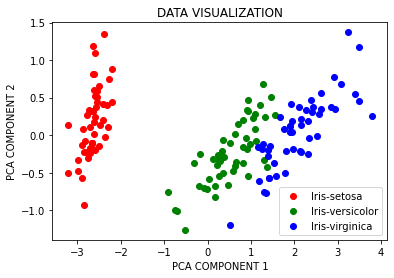

In [12]:
#Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_r = pca.fit_transform(X_set)

#Plot the data
target_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
   plt.scatter(X_r[y==i,0], X_r[y==i,1], c=c, label=target_name)
plt.legend()
plt.title('DATA VISUALIZATION')
plt.xlabel('PCA COMPONENT 1')
plt.ylabel('PCA COMPONENT 2')
plt.show()


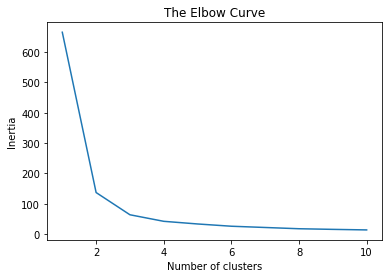

In [13]:
#Find Optimum Number of clusters for k-means algorithm
inertia = []                        #Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, algorithm = 'auto', copy_x = True, init = 'k-means++', max_iter = 300, n_init = 10,
                           random_state = 42, tol = 0.0001, verbose=0)
    kmeans.fit(X_r)
    inertia.append(kmeans.inertia_)
    
#Plot the elbow curve
plt.plot(range(1,11), inertia)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the elbow curve, we can see the optimum number of clusters is 3. As after that, no significant changes are occured.


In [14]:
no_of_clusters = 3         #Optimum number of Clusters = 3

IMPLEMENTATION OF DIFFERENT CLUSTERING MODELS

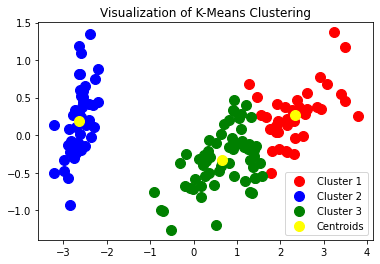

In [15]:
#K-MEANS
def KMEANS(): 
  #Creating K-Means clustering model 
  kmeans = KMeans(n_clusters = no_of_clusters, algorithm = 'auto', copy_x = True, init = 'k-means++', max_iter = 300, n_init = 10, 
                  random_state = 42, tol = 0.0001, verbose=0)
  kmeans.fit(X_r)
  pred = kmeans.predict(X_r)
  plt.scatter(X_r[pred == 0, 0], X_r[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
  plt.scatter(X_r[pred == 1, 0], X_r[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
  plt.scatter(X_r[pred == 2, 0], X_r[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

  #Plotting the centroids of the clusters
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
  plt.title('Visualization of K-Means Clustering')
  plt.legend()
  return pred

kmeans_y_pred = KMEANS()

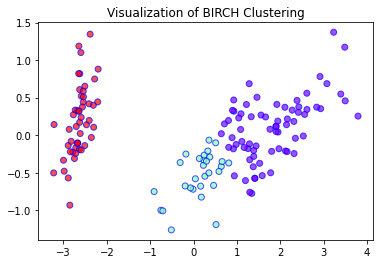

In [16]:
#Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) 
def BIRCH(): 
  #Creating BIRCH clustering model 
  birch = Birch(branching_factor = 50, compute_labels = True, copy = True, n_clusters = 3, threshold = 0.5)
  birch.fit(X_r)
  y_pred = birch.predict(X_r)
  plt.scatter(X_r[:, 0], X_r[:, 1], c = y_pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
  plt.title('Visualization of BIRCH Clustering')
  plt.show()
  return y_pred
  
birch_y_pred = BIRCH()

In [17]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 3.7 MB/s 


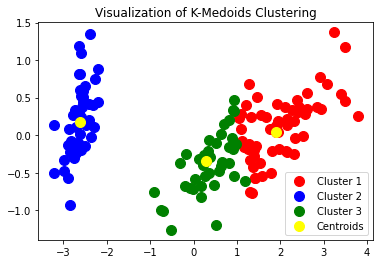

In [18]:
#K-Medoid
from sklearn_extra.cluster import KMedoids
def k_MEDOIDs():
  kmedoids = KMedoids(n_clusters = no_of_clusters)
  kmedoids.fit(X_r)
  y_pred = kmedoids.predict(X_r)
  plt.scatter(X_r[y_pred == 0, 0], X_r[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
  plt.scatter(X_r[y_pred == 1, 0], X_r[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
  plt.scatter(X_r[y_pred == 2, 0], X_r[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

  #Plotting the centroids of the clusters
  plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
  plt.title('Visualization of K-Medoids Clustering')
  plt.legend()
  return y_pred

kmedoid_y_pred = k_MEDOIDs()

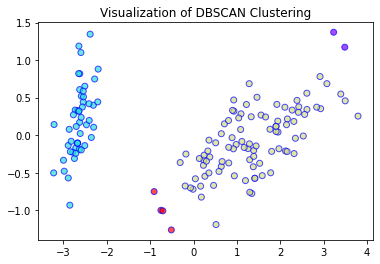

In [19]:
#Density Based Spatial Clustering of Applications with Noise (DBSCAN)
def Density_Based_SCAN():
  dbscan= DBSCAN(eps = 0.5, min_samples = 3, algorithm = 'auto', leaf_size = 30, metric = 'euclidean',metric_params = None, n_jobs = None, p = None)
  dbscan.fit(X_r)
  y_pred = dbscan.fit_predict(X_r)
  plt.scatter(X_r[:, 0], X_r[:, 1], c = y_pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
  plt.title('Visualization of DBSCAN Clustering')
  plt.show()
  return y_pred

dbscan_y_pred = Density_Based_SCAN()

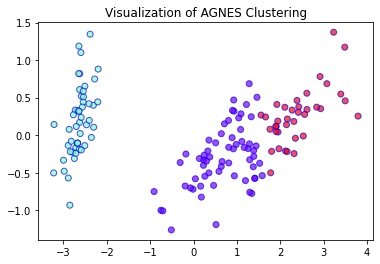

In [20]:
#Agglomerative Clustering (AGNES)
def AGNES():
  agnes = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, distance_threshold=None,
                                 linkage='ward', memory=None, n_clusters = 3)
  agnes.fit(X_r)
  y_pred = agnes.fit_predict(X_r)
  plt.scatter(X_r[:, 0], X_r[:, 1], c = y_pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
  plt.title('Visualization of AGNES Clustering')
  plt.show()
  return y_pred
  
agnes_y_pred = AGNES()

Performance Analysis of Different Clustering Models Using ARI, NMI and Silhouetee Score

In [21]:
def performance_analysis(pred):
  silhouette_score_ = silhouette_score(X_r, pred)
  ARI = adjusted_rand_score(y, pred)
  NMI = normalized_mutual_info_score(y, pred)
  return silhouette_score_, ARI, NMI

In [22]:
def print_score(CLUSTER, y_pred):
  print('For ' + CLUSTER)
  sil_score, ari, nmi = performance_analysis(y_pred)
  print('Silhouette Score: %.4f' % sil_score)
  print('ARI score: %.4f' % ari)
  print('NMI score: %.4f' % nmi)
  print('')

In [23]:
print_score('K-Means', kmeans_y_pred)
print_score('BIRCH', birch_y_pred)
print_score('K-Medoid', kmedoid_y_pred)
print_score('DBSCAN', dbscan_y_pred)
print_score('AGNES', agnes_y_pred)

For K-Means
Silhouette Score: 0.5976
ARI score: 0.7163
NMI score: 0.7419

For BIRCH
Silhouette Score: 0.5584
ARI score: 0.6516
NMI score: 0.7270

For K-Medoid
Silhouette Score: 0.5626
ARI score: 0.7720
NMI score: 0.7832

For DBSCAN
Silhouette Score: 0.4053
ARI score: 0.5551
NMI score: 0.6950

For AGNES
Silhouette Score: 0.5984
ARI score: 0.7445
NMI score: 0.7777



IMPLEMENTATION OF K-Medoid and DBSCAN from Scratch

Text(0.5, 1.0, 'Visualization of K-Medoid Clustering')

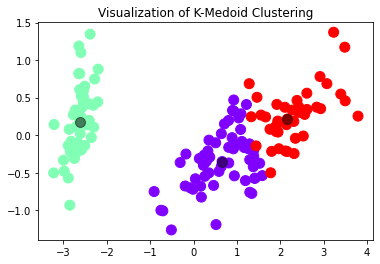

In [24]:
#K-Medoid

def get_medoid(no_clusters, no_samples):
  initial_centers = []
  while len(initial_centers) < no_clusters:
    temp = np.random.randint(0,no_samples)
    if not temp in initial_centers:
      initial_centers.append(temp)
  return initial_centers

def get_cost(X, centers_id):
  dist_mat = np.zeros((len(X),len(centers_id)))
  #distance matrix, euclidean distance
  for j in range(len(centers_id)):
    centroid = X[centers_id[j],:]
    for i in range(len(X)):
      if i == centers_id[j]:
        dist_mat[i,j] = 0.
      else:
        dist_mat[i,j] = distance.euclidean(X[i,:], centroid)
  #Find the closest centroid for each data point
  mask = np.argmin(dist_mat,axis=1)
  members = np.zeros(len(X))
  costs = np.zeros(len(centers_id))
  for i in range(len(centers_id)):
    mem_id = np.where(mask==i)
    members[mem_id] = i
    costs[i] = np.sum(dist_mat[mem_id,i])
  return members, costs, np.sum(costs), dist_mat

def KMedoids(X, n_clusters, max_iter = 300, tol = 0.0001):
  n_samples, n_features = X.shape
  md = get_medoid(n_clusters,n_samples)          
  medoids = md
  members, costs, dj, dist_mat = get_cost(X, md)  
  swap = True
  count = 0
  while True:
    swap = False
    for i in range(n_samples):
      if not i in medoids:
        for j in range(len(medoids)):
          medoids_ = copy(medoids)
          medoids_[j] = i
          members_, costs_, di, dist_mat_ = get_cost(X, medoids_)
          if di-dj < tol:
            members, costs, dj, dist_mat = members_, costs_, di, dist_mat_
            medoids = medoids_
            swap = True
    if count > max_iter:
      break
    if not swap:
      break
    count += 1
  return medoids,members

medoids,labels = KMedoids(X_r, n_clusters = 3, max_iter = 300, tol=0.0001)

#Visualization
plt.scatter(X_r[:, 0], X_r[:, 1], c = labels, s = 100, cmap='rainbow')
for i in range(len(medoids)):
    plt.scatter(X_r[medoids[i],0],X_r[medoids[i],1],c = 'black', s = 100, alpha = 0.5)
plt.title('Visualization of K-Medoid Clustering')

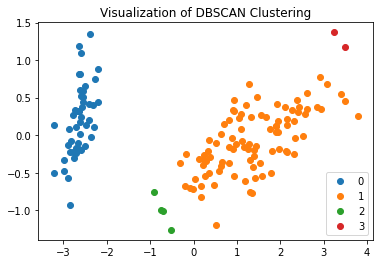

In [25]:
#DBSCAN

def findNeighbours(X, s, visited):
  neighbours = []
  neighbours.append((s[0],s[1]))
  for t in X:
    if distance.euclidean(s,t) < eps:
      neighbours.append((t[0],t[1]))
  return neighbours

def process(X, Y): 
  visited_points = []
  noise = []
  core_points = []
  for x in X:
    if ((x[0],x[1])) not in visited_points:
      visited_points.append((x[0],x[1]))
      neighbours = findNeighbours(X,x,visited_points)
      if len(neighbours) < minPts: 
        noise = noise + neighbours 
        continue
      else:
        new_core = []
        new_core.append((x[0],x[1]))
        neighbours.remove((x[0],x[1]))
        seedset = neighbours                    
        while len(seedset) > 0:
          p = seedset.pop(0)
          if (p[0],p[1]) in noise:
            noise.remove((p[0],p[1]))
            new_core.append((p[0],p[1]))
          if (p[0],p[1]) not in visited_points:
            visited_points.append((p[0],p[1]))
            new_core.append((p[0],p[1]))
            neighbours = findNeighbours(X,p,visited_points)
            if len(neighbours) >= minPts:
              seedset = seedset + neighbours  
        core_points.append(new_core)
  return core_points, noise          

def plotDBSCAN(all_core, noise):
  for i,core in enumerate(all_core):
    X_p = []
    Y_p = []
    pt = []
    for x_p,y_p in core:
      X_p.append(x_p)
      Y_p.append(y_p)
      pt.append([x_p,y_p])
    plt.scatter(X_p,Y_p, label=i)
  plt.title('Visualization of DBSCAN Clustering')
  plt.legend()
  plt.show()

eps = 0.5
minPts = 3
all_core, noise = process(X_r, y)
plotDBSCAN(all_core, noise)